# Final QAC Analysis (first and second cycles)
by Deep Datta, Giri Ganta, Mihir Gathani, Patrick Kelleher, William Swain

## First Cycle: Intial QAC Analysis

### Question: Do Vessels Fish Around Shipwrecks More Often Than Not?

- The United States has a long history of shipwrecks from fishing vessels to actual tankers. Many vessels wreck each year and some are not listed down. The question is whether vessels fish around shipwrecks more often than not because of the theory that fish like the cover of obstructions and big objects from our knowledge of fresh water fishing because tend to stay around structures for safety.
  
- The US Office of Coast/ NOAA have a dataset at: https://nauticalcharts.noaa.gov/data/wrecks-and-obstructions.html which provides us with data regarding wrecks.
- We get some of our other data on fishing vessels from the Global Fishing Watch website: https://globalfishingwatch.org/
- We also get some of our data from the General Bathymetric Chart of the Oceans (GEBCO) for our depth values at: https://download.gebco.net/  

#
- Overview of our method:
    1. Get the data from the websites above.
    2. Merge and clean the datasets into one major method
    3. Next, visualize the data to see if there is a correlation between the shipwrecks and the fishing vessels. 
    4. Finally, check to see if the correlation answers are question above.

#
- Credit Listing:   
    1. Deep Datta - Worked on QAC and helped with the research questions.
    2. Giri Ganta - Worked on QAC and helped with plotting the data.
    3. Mihir Gathani - Worked on QAC and helped with data cleaning and formatting.
    4. Patrick Kelleher - Worked on the plotting and analysis of the data.
    5. William Swain - Worked on the plotted and analysis of the data.

Here, we import the required packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

### Analysis 

Here, we perform data cleaning by removing the extra data, and bounding it to the box of 23.5N to 50N and 100W to 60W since that limits the data to the east coast of the US and Gulf of Mexico, which is where our interest lies. We also merge the cleaned fishing vessels data into a new data frame with the required columns.


In [17]:
curr_date = dt.strptime("2020-01-02", "%Y-%m-%d")
end_date = dt.strptime("2020-12-31", "%Y-%m-%d")
vessels_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
# Remove where fishing hours is 0 because that means the vessel wasn't fishing at that location
vessels_df = vessels_df[vessels_df.fishing_hours != 0]
# Only include vessels in the region between 23.5N and 50N and 100W and 60W
vessels_df = vessels_df[vessels_df.cell_ll_lat >= 23.5]
vessels_df = vessels_df[vessels_df.cell_ll_lat <= 50]
vessels_df = vessels_df[vessels_df.cell_ll_lon <= -60]
vessels_df = vessels_df[vessels_df.cell_ll_lon >= -100]
curr_date = curr_date + relativedelta(days=1)
while curr_date < end_date:
    temp_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
    # Remove where fishing hours is 0 because that means the vessel wasn't fishing at that location
    temp_df = temp_df[temp_df.fishing_hours != 0]
    # Only include vessels in the region between 23.5N and 50N and 100W and 60W
    temp_df = temp_df[temp_df.cell_ll_lat >= 23.5]
    temp_df = temp_df[temp_df.cell_ll_lat <= 50]
    temp_df = temp_df[temp_df.cell_ll_lon <= -60]
    temp_df = temp_df[temp_df.cell_ll_lon >= -100]
    vessels_df = pd.concat([vessels_df, temp_df])
    curr_date = curr_date + relativedelta(days=1)
    print(f'{curr_date:%Y-%m-%d}', end='\r')

display(vessels_df.info()) # display the type of information that vessels_df contains
vessels_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316224 entries, 6462 to 88002
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           316224 non-null  object 
 1   cell_ll_lat    316224 non-null  float64
 2   cell_ll_lon    316224 non-null  float64
 3   mmsi           316224 non-null  int64  
 4   hours          316224 non-null  float64
 5   fishing_hours  316224 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.9+ MB


None

,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours
6462,2020-01-02,25.0,-82.5,367680570,14.1386,13.1827
6463,2020-01-02,25.0,-82.6,367680570,2.0897,2.0897
6899,2020-01-02,27.0,-83.0,367532970,1.7083,1.7083
6965,2020-01-02,28.0,-94.1,367743330,5.0741,4.8241
7040,2020-01-02,29.0,-89.9,366861460,13.6988,10.4994
...,...,...,...,...,...,...
87065,2020-12-30,31.8,-78.8,367719840,1.7255,0.2591
87659,2020-12-30,41.6,-68.6,368161410,0.2605,0.2605
87999,2020-12-30,43.6,-69.9,368016910,4.2641,2.1730
88000,2020-12-30,43.6,-69.2,368017040,7.3930,6.3683


We then cleaned the AWOIS wrecks file to have the same bounding box as our vessels data.

In [18]:
wrecks_df = pd.read_excel("AWOIS_Wrecks.xlsx")
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]>23.5]
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]<50]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]<-60]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]>-100]

display(wrecks_df.info()) # display type of information that wrecks_df contains
wrecks_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 6221
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECRD          5210 non-null   int64  
 1   VESSLTERMS     5210 non-null   object 
 2   FEATURE_TYPE   4955 non-null   object 
 3   LATDEC         5210 non-null   float64
 4   LONDEC         5210 non-null   float64
 5   GP_QUALITY     5166 non-null   object 
 6   DEPTH          4317 non-null   float64
 7   SOUNDING_TYPE  1575 non-null   object 
 8   YEARSUNK       173 non-null    float64
 9   HISTORY        5146 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 447.7+ KB


c:\Users\willi\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


None

,RECRD,VESSLTERMS,FEATURE_TYPE,LATDEC,LONDEC,GP_QUALITY,DEPTH,SOUNDING_TYPE,YEARSUNK,HISTORY
0,14620,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",42.143528,-80.114556,High,18.0,Feet and tenths,NaN,F00542: S-W904-NRT4-07; Office review indica...
1,14292,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",41.498284,-81.759593,High,26.0,Feet and tenths,NaN,H11689/2007-- S-w920-NRT4-07; Dangerous sub...
2,14296,ALGERIA,"Wreck - Submerged, dangerous to surface naviga...",41.520448,-81.716076,High,32.0,Feet and tenths,NaN,H11689/2007-- S-W920-NRT4-07; A large subme...
3,14298,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",41.512713,-81.709879,High,22.0,Feet and tenths,NaN,H11689/2007-- S-W920-NRT4-07; A submerged w...
4,14207,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",42.993389,-82.426583,High,34.0,Feet and tenths,NaN,CL 1883/1999-- The Canadian Hydrographic Se...
...,...,...,...,...,...,...,...,...,...,...
6217,2886,NORHTEASTERN,Not Charted,35.091842,-75.557928,Poor,0.0,NaN,NaN,SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED
6218,2887,ARRAYO,Not Charted,34.983500,-76.051289,Poor,0.0,NaN,NaN,SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED
6219,2889,NORDAL,Not Charted,34.691842,-75.584597,Poor,0.0,NaN,NaN,_x000D_\nDESCRIPTION ...
6220,14917,USS VIRGINA,"Wreck - Submerged, nondangerous",35.019290,-75.285944,Med,103.0,Feet and tenths,1923.0,American Battleship of WWI vintage sunk during...


For our ocean depth dataset, we made it so any terrain that had a positive value (i.e. above sea level) to have a value of 500. This is because the dataset included elevation above sea levels, so by making the elevation values the same and far enough away from 0, we get a much cleaner looking plot, visually. 

In [19]:
# This is the information given to us with the data
# ncols        9600
# nrows        6360
# xllcorner    -100.000000000000
# yllcorner    23.500000000000
# cellsize     0.004166666667
# NODATA_value -32767
cols = [-100 + i*0.004166666667 for i in range(9600)]
cols.insert(0, 'throwaway')
rows = [50 - i*0.004166666667 for i in range(6360)]
depth_df = pd.read_csv("./GEBCO_06_Nov_2022_e0f252343eb4/gebco_2022_n50.0_s23.5_w-100.0_e-60.0.asc", delimiter=" ", names=cols)
depth_df.index = rows
depth_df = depth_df.drop(columns="throwaway")
depth_df[depth_df > 0] = 500
depth_df

,-100.000000,-99.995833,-99.991667,-99.987500,-99.983333,-99.979167,-99.975000,-99.970833,-99.966667,-99.962500,...,-60.041667,-60.037500,-60.033333,-60.029167,-60.025000,-60.020833,-60.016667,-60.012500,-60.008333,-60.004167
50.000000,500,500,500,500,500,500,500,500,500,500,...,-149,-147,-133,-133,-133,-137,-131,-131,-134,-135
49.995833,500,500,500,500,500,500,500,500,500,500,...,-146,-145,-135,-127,-127,-131,-131,-131,-132,-132
49.991667,500,500,500,500,500,500,500,500,500,500,...,-149,-144,-136,-130,-130,-129,-129,-129,-127,-126
49.987500,500,500,500,500,500,500,500,500,500,500,...,-147,-143,-137,-133,-133,-131,-127,-127,-125,-124
49.983333,500,500,500,500,500,500,500,500,500,500,...,-141,-141,-138,-134,-134,-131,-129,-129,-128,-128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.520833,500,500,500,500,500,500,500,500,500,500,...,-5938,-5936,-5935,-5933,-5932,-5932,-5931,-5930,-5932,-5934
23.516667,500,500,500,500,500,500,500,500,500,500,...,-5938,-5937,-5935,-5934,-5933,-5932,-5932,-5931,-5933,-5934
23.512500,500,500,500,500,500,500,500,500,500,500,...,-5938,-5938,-5936,-5935,-5935,-5934,-5933,-5933,-5934,-5936
23.508333,500,500,500,500,500,500,500,500,500,500,...,-5939,-5939,-5938,-5937,-5936,-5936,-5935,-5935,-5936,-5937


With data gathering and cleaning completed, we overlay the fishing boat data and the shipwreck data to see if there is any correlation.

Text(0.5, 0, 'Longitude')

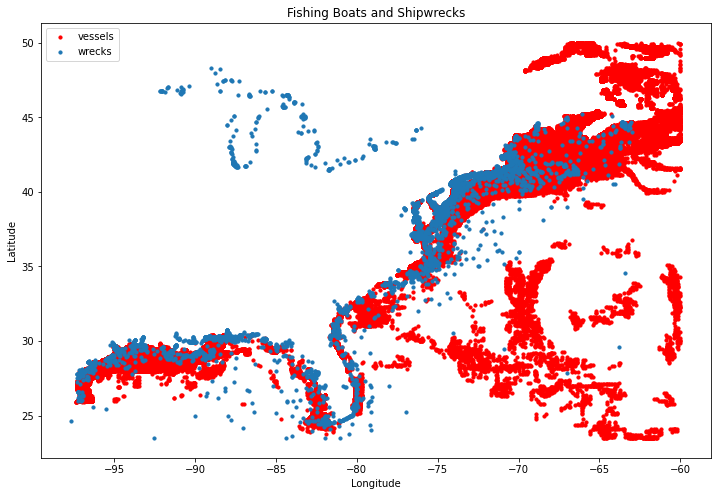

In [20]:
axes = vessels_df.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False, label = "vessels")
axes= wrecks_df.plot.scatter(x='LONDEC',y='LATDEC',vmin=0,vmax=6,s=10,figsize=(12,8), alpha=1,sharex=False,ax=axes,title="Fishing Boats and Shipwrecks", label = "wrecks")
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

The data looks promising from a distance, with a heavy presence of shipwrecks and fishing boats lining the coast.

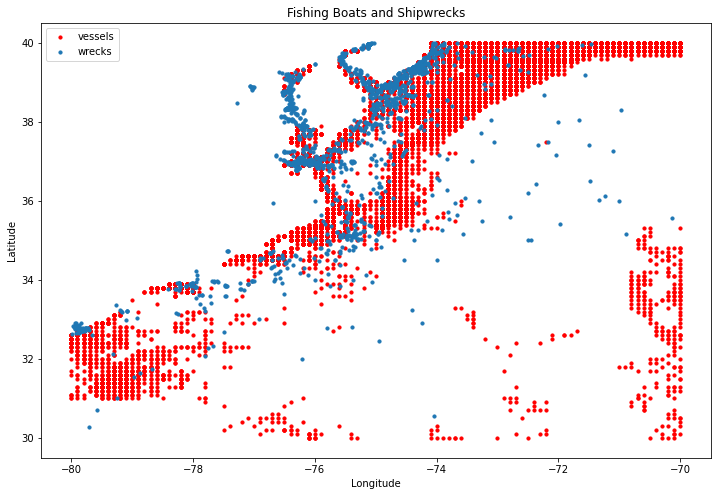

In [21]:
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]>30]
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]<40]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]<-70]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]>-80]

vessels_overlay = vessels_df.copy()
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat >= 30]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat <= 40]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon <= -70]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon >= -80]

axes = vessels_overlay.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False, label = "vessels")
axes= wrecks_df.plot.scatter(x='LONDEC',y='LATDEC',vmin=0,vmax=6,s=10,figsize=(12,8), alpha=1,sharex=False,ax=axes,title="Fishing Boats and Shipwrecks", label = "wrecks")
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.legend(loc = "upper left")

However, when taking a closer look the data shows that fishing boats appear to avoid areas with many shipwrecks. A possible reason for this is that shipwrecks are caused by hazardous waters and fishing boats steer clear of those areas.

This data shows that fishing boats do not tend to fish around shipwrecks.

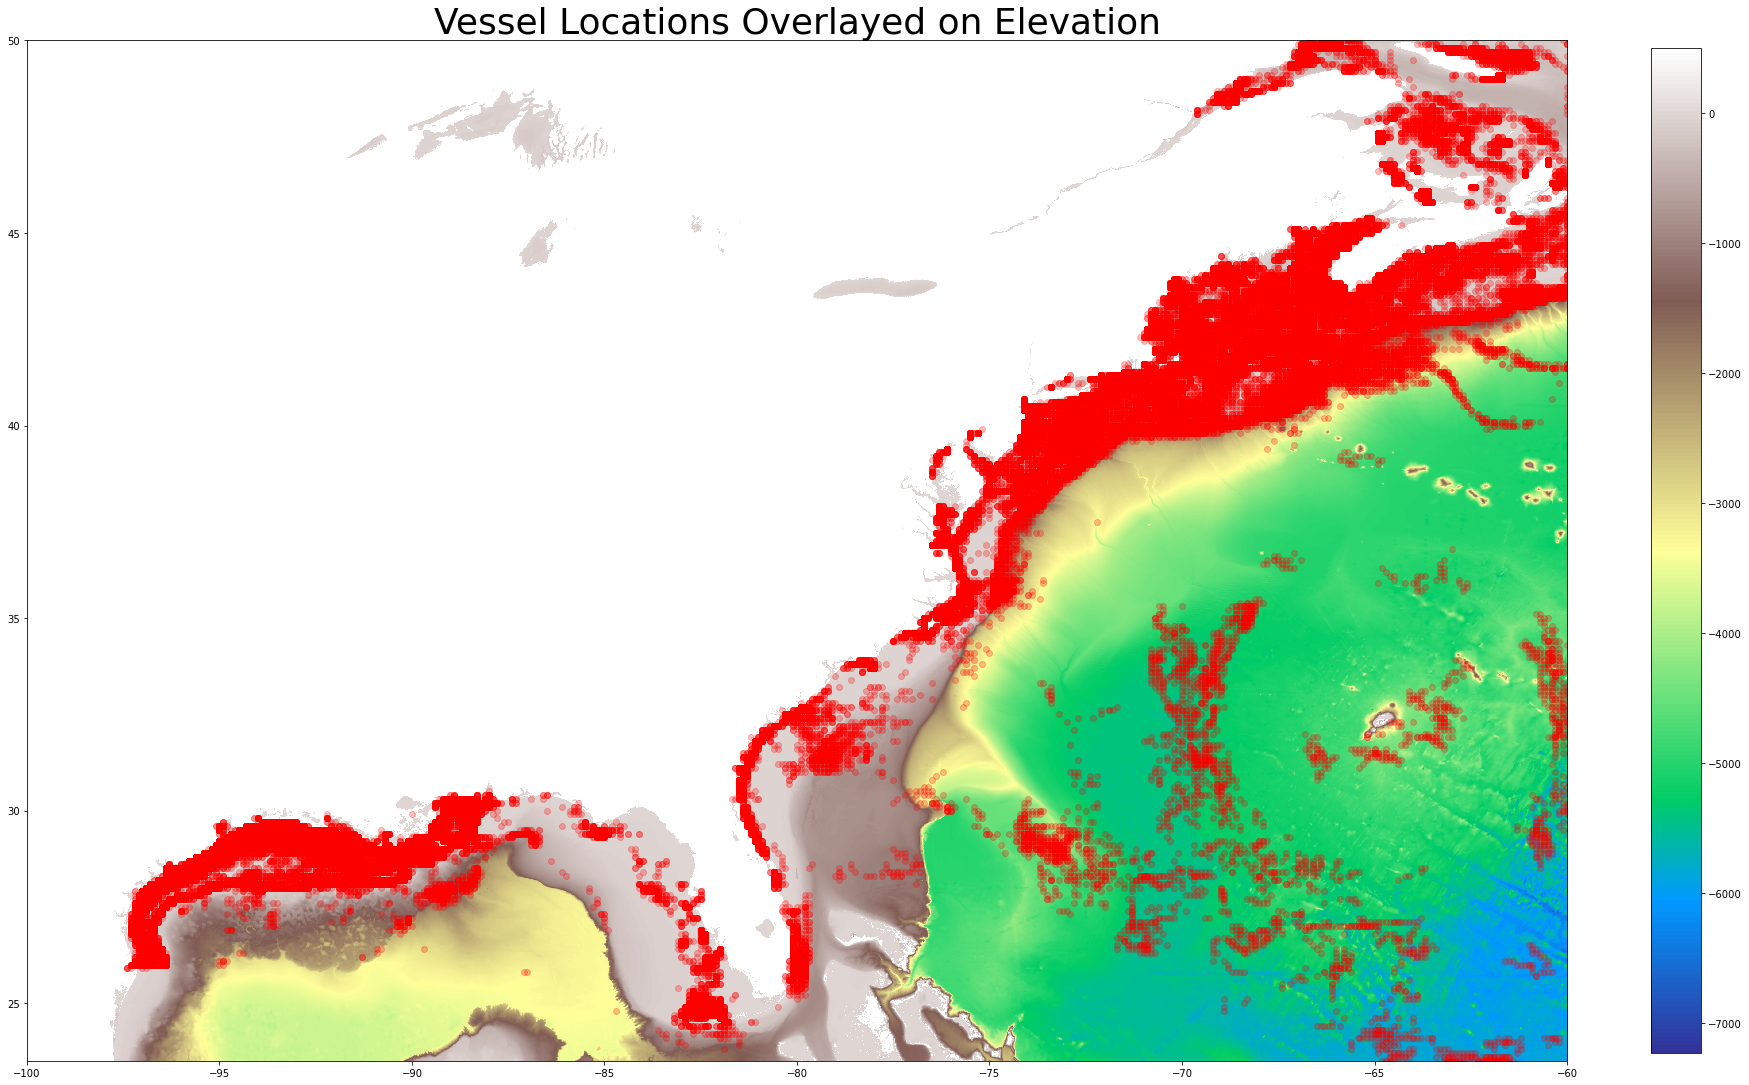

In [22]:
plt.figure(figsize=(30, 30))
plt.imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
plt.colorbar(fraction=0.03)
plt.scatter(vessels_df['cell_ll_lon'], vessels_df['cell_ll_lat'], vmin=0, vmax=6, color="red", alpha=0.25)
plt.title("Vessel Locations Overlayed on Elevation", fontsize=36)
plt.show()

In [23]:
df = pd.DataFrame(depth_df)
df = df.iloc[lambda x:x.index<37]
df = df.iloc[:,[column>-75 for column in df.columns]]
df

,-75.000000,-74.995833,-74.991667,-74.987500,-74.983333,-74.979167,-74.975000,-74.970833,-74.966667,-74.962500,...,-60.041667,-60.037500,-60.033333,-60.029167,-60.025000,-60.020833,-60.016667,-60.012500,-60.008333,-60.004167
37.000000,-43,-46,-41,-41,-41,-41,-41,-41,-43,-43,...,-5212,-5217,-5213,-5206,-5203,-5201,-5199,-5192,-5185,-5181
36.995833,-46,-66,-42,-42,-42,-41,-41,-41,-42,-42,...,-5206,-5209,-5208,-5202,-5196,-5192,-5188,-5182,-5176,-5175
36.991667,-44,-132,-42,-42,-41,-40,-40,-41,-42,-43,...,-5195,-5195,-5190,-5185,-5186,-5184,-5179,-5173,-5171,-5174
36.987500,-162,-124,-41,-41,-40,-40,-40,-37,-37,-44,...,-5187,-5187,-5185,-5181,-5178,-5173,-5168,-5165,-5165,-5169
36.983333,-94,-75,-39,-39,-39,-39,-42,-39,-39,-41,...,-5181,-5181,-5179,-5176,-5173,-5169,-5161,-5158,-5160,-5165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.520833,-2120,-2217,-2287,-2362,-2448,-2541,-2626,-2628,-2621,-2620,...,-5938,-5936,-5935,-5933,-5932,-5932,-5931,-5930,-5932,-5934
23.516667,-1932,-2036,-2134,-2233,-2334,-2434,-2516,-2542,-2550,-2555,...,-5938,-5937,-5935,-5934,-5933,-5932,-5932,-5931,-5933,-5934
23.512500,-1742,-1854,-1974,-2091,-2204,-2307,-2394,-2433,-2456,-2474,...,-5938,-5938,-5936,-5935,-5935,-5934,-5933,-5933,-5934,-5936
23.508333,-1583,-1695,-1827,-1955,-2071,-2172,-2254,-2311,-2352,-2383,...,-5939,-5939,-5938,-5937,-5936,-5936,-5935,-5935,-5936,-5937


During processing, we noticed that there were was an interesting pattern of fishing boats farther off the coast. This data seems to have some kind of correlation with the seafloor elevation data. This interesting relationship prompts a new question, can fishing boat locations be used to predict bathymetric data?

,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours
6770,2020-01-14,32.0,-63.7,310996688,0.1161,0.1161
6771,2020-01-14,32.0,-63.6,310996688,1.1913,1.1913
77288,2020-01-14,31.9,-63.9,310996688,1.6919,1.6919
77289,2020-01-14,31.9,-63.6,310996688,12.3572,12.3572
77291,2020-01-14,31.9,-63.7,310996688,0.3600,0.3600
...,...,...,...,...,...,...
19772,2020-12-12,26.5,-71.7,367500860,8.7044,8.7044
19774,2020-12-12,26.5,-71.4,367500860,6.5902,6.5902
70505,2020-12-12,26.4,-71.7,367500860,5.0402,5.0402
85753,2020-12-12,35.8,-74.4,338140028,5.1080,5.1080


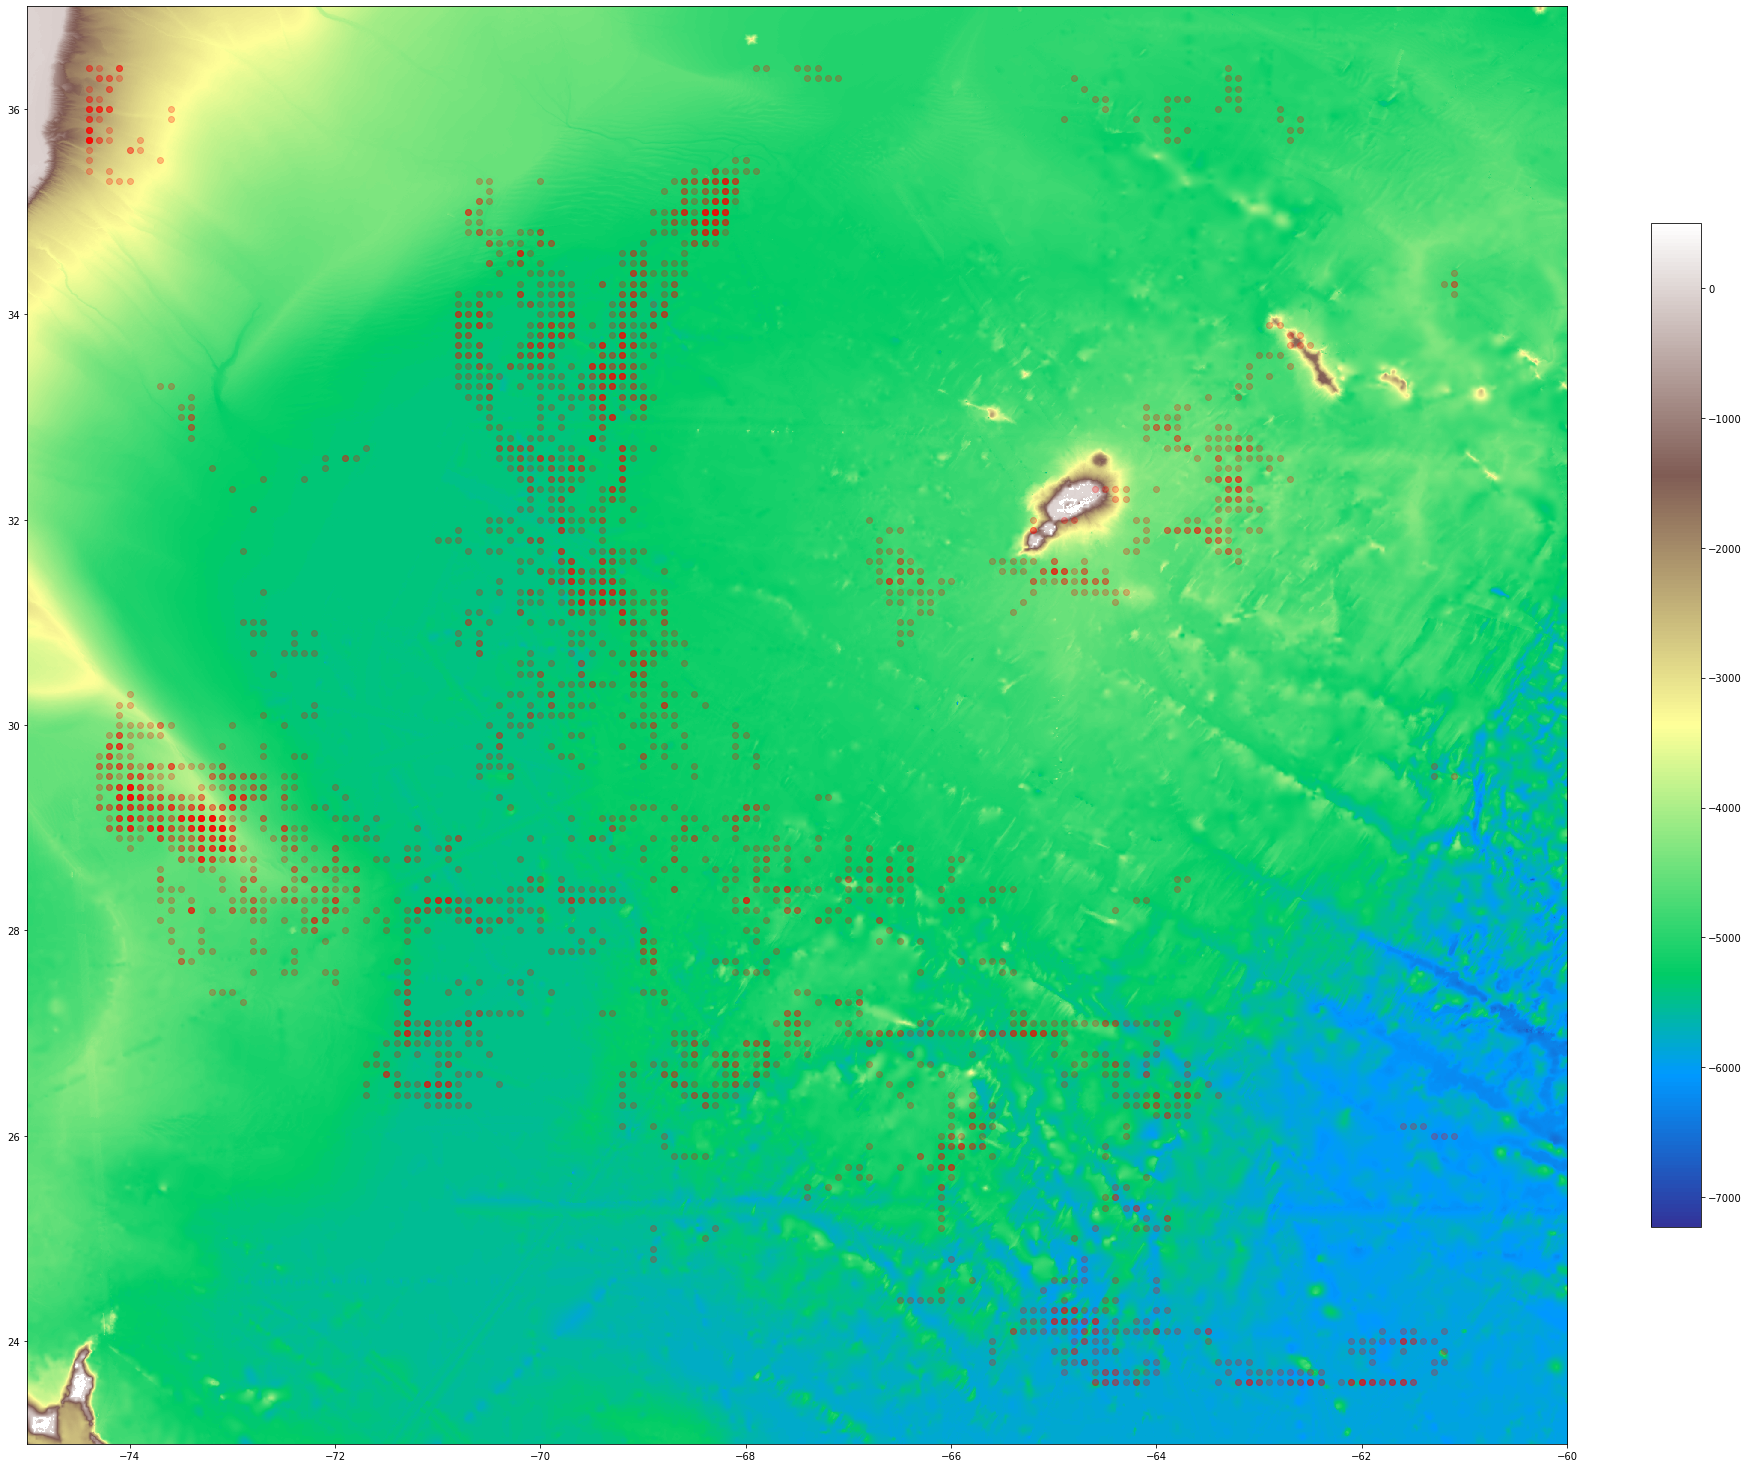

In [24]:
plt.figure(figsize=(30, 30))
plt.imshow(df, cmap="terrain", interpolation="none", extent=[-75, -60, 23, 37])
vessels_overlay = vessels_df.copy()
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat > 23.5]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat < 36.5]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon < -61]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon > -74.5]

plt.colorbar(fraction=0.03)
plt.scatter(vessels_overlay['cell_ll_lon'], vessels_overlay['cell_ll_lat'], vmin=0, vmax=6, color="red", alpha=0.25)
vessels_overlay

In [25]:
longs = df.columns
lats = df.index


def matcher(x):
    closest_lat = 0
    closest_long = 0
    for lat in lats:
        if x[1] >= lat:
            closest_lat = lat
            break
    for long in longs:
        if x[2] <= long:
            closest_long = long
            break
    return df.at[closest_lat,closest_long]

vessels_overlay['Depth']=vessels_overlay.apply(matcher,axis=1) 
vessels_overlay['Depth'].sum()/vessels_overlay.shape[0] #average ship depth

-5092.4099271086425

In [26]:
df.mean().mean() #average depth 

-5057.967105881341

### Conclusion

- Thanks to our analysis we figured out that there is not enough of a correlation between fishing boat locations and shipwrecks. The reason for it being inconclusive was that there was a correlation between shipwrecks and fishing vessels near the shore, but not further from the coast. Now we are exploring the connection between fishing boat connections and ocean floor elevations to see if there is a correlation there. From there we will revise as necessary based on the previous hypothesis unless more problems arise in our data.

- Caveats: Had to revise our data and find more data due to a lot of missing data in our original dataset. Also, we had to find a way to merge the datasets together because they were not in the same format.

- Future work: We are going to look at the connection between fishing boat locations and ocean floor elevations to see if there is a correlation there. We may also revise our question(s) in the future depending on the data that has been gathered due to the huge amount of data that is unavailable.

- Open Questions: How often do people fish around shipwrecks? What reasons do they fish around shipwrecks? How far back does this trend go? How far back does the data go in the US in terms of shipwrecks? 

## Second Cycle: Final QAC Analysis

### New Questions and Hypotheses 

- this is where we remake our hypothesis including add in more questions (connect it with the new depth data)
- make this a bit bulkier than previous
- follow the example from the notes
- talk about the new generation of questions from previous results
- overview of method
- where we got the old and new data with links 
- new credit listing including a listing of what work was done by who including work not used

In [ ]:
# put imports here or any setup stuff (optional)

### Analysis

- intro on analysis including a quick summary on step then start with step one and go from there through each step
- add new deatails and new visualizations

- end the analysis here with some mini pondering or conclusion 

## Conclusion

- this is where we end the analysis with a conclusion on the new data and the new questions
- caveats, future work, open questions are important 